In [ ]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

In [ ]:
colnames = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'Target']
df = pd.read_csv('./bank-full.csv')
df.head(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
df.shape # Shape of the data

(45211, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.fillna(value=df.mean())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:

# Delete the rows which column 'poutcome' contains 'other'
other = df.poutcome == 'other'
df1 = df.drop(df[other].index, axis = 0, inplace = False)

# Step 2: Fill 'unknown' in job and education to 'other'
df1[['job','education']] = df1[['job','education']].replace(['unknown'],'other')

df1.head(30)

df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


## Data Summary

In [ ]:
print(df1.info())
print(df1.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43371 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43371 non-null  int64 
 1   job        43371 non-null  object
 2   marital    43371 non-null  object
 3   education  43371 non-null  object
 4   default    43371 non-null  object
 5   balance    43371 non-null  int64 
 6   housing    43371 non-null  object
 7   loan       43371 non-null  object
 8   contact    43371 non-null  object
 9   day        43371 non-null  int64 
 10  month      43371 non-null  object
 11  duration   43371 non-null  int64 
 12  campaign   43371 non-null  int64 
 13  pdays      43371 non-null  int64 
 14  previous   43371 non-null  int64 
 15  poutcome   43371 non-null  object
 16  Target     43371 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.0+ MB
None
                age        balance  ...         pdays      previous
count  43371.000000   4337

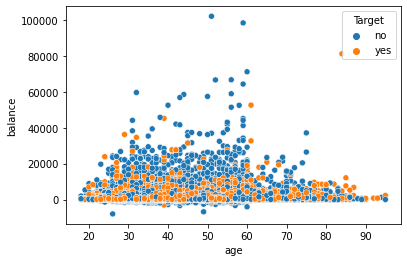

In [ ]:
sns.scatterplot(x='age',y='balance',hue='Target',data=df1)


## Data Visualization

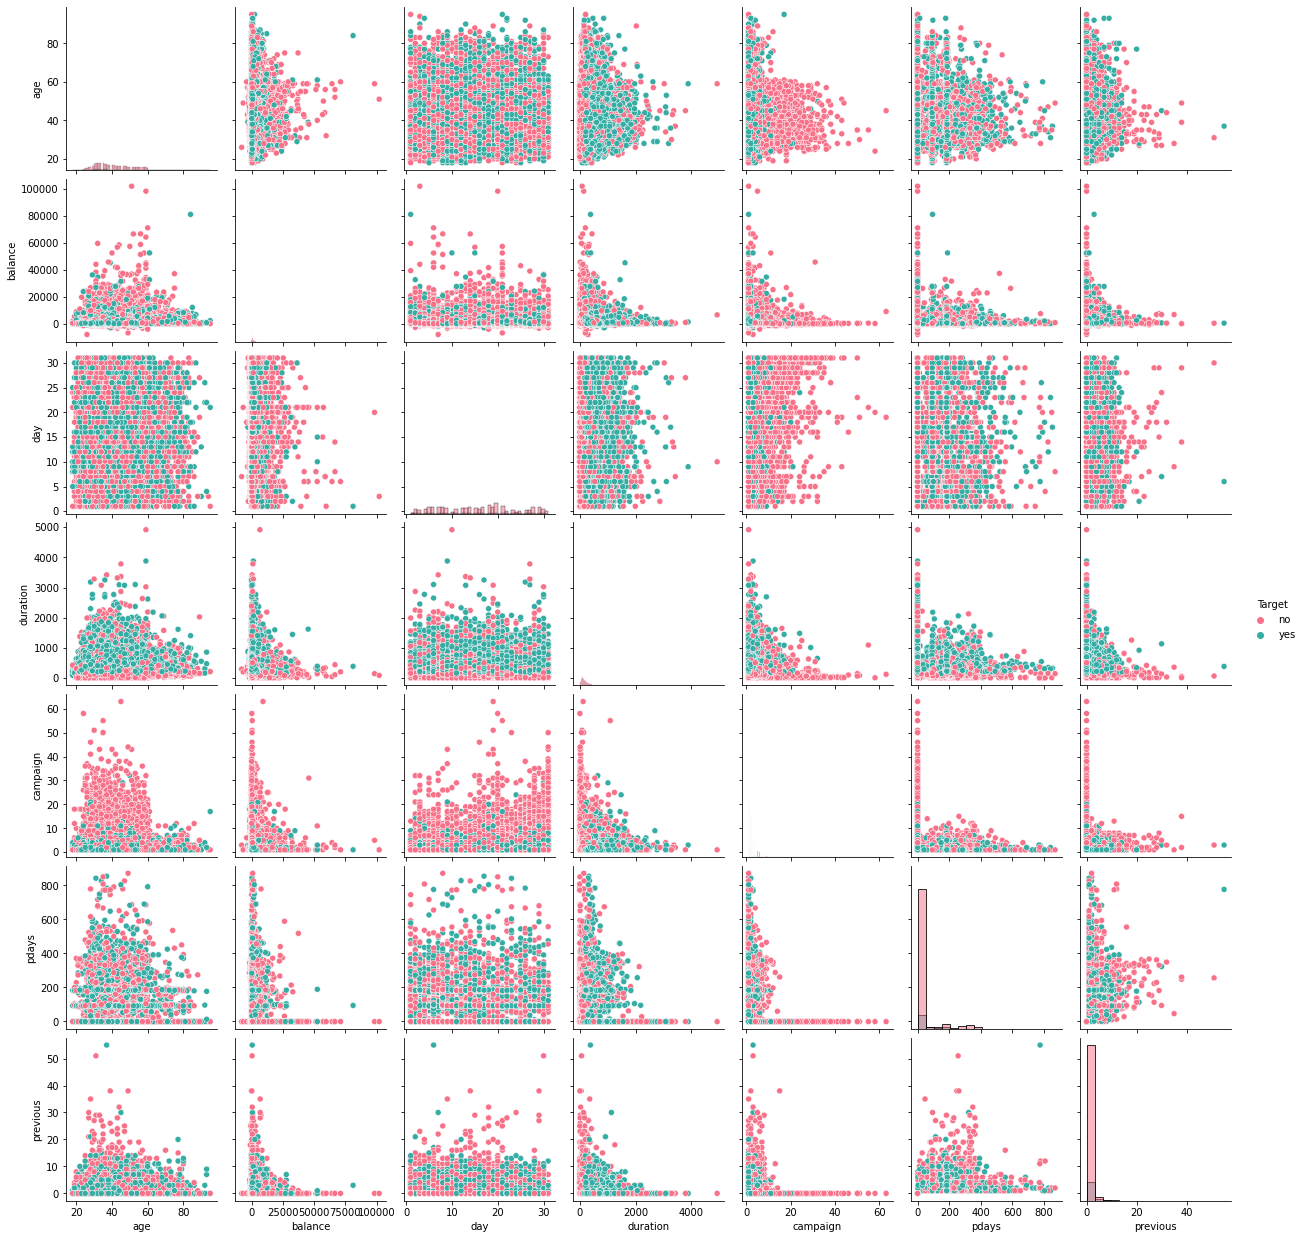

In [ ]:
sns.pairplot(df1, hue="Target", diag_kind = 'hist', palette="husl")

In [ ]:
corr = df1.corr()
corr


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.094051,-0.011422,-0.006463,0.003840,-0.007011,0.013018
balance,0.094051,1.000000,0.001217,0.020134,-0.013255,0.004652,0.018805
day,-0.011422,0.001217,1.000000,-0.032632,0.168613,-0.088033,-0.054828
duration,-0.006463,0.020134,-0.032632,1.000000,-0.082664,0.000715,0.005559
campaign,0.003840,-0.013255,0.168613,-0.082664,1.000000,-0.093630,-0.051453
pdays,-0.007011,0.004652,-0.088033,0.000715,-0.093630,1.000000,0.569136
previous,0.013018,0.018805,-0.054828,0.005559,-0.051453,0.569136,1.000000


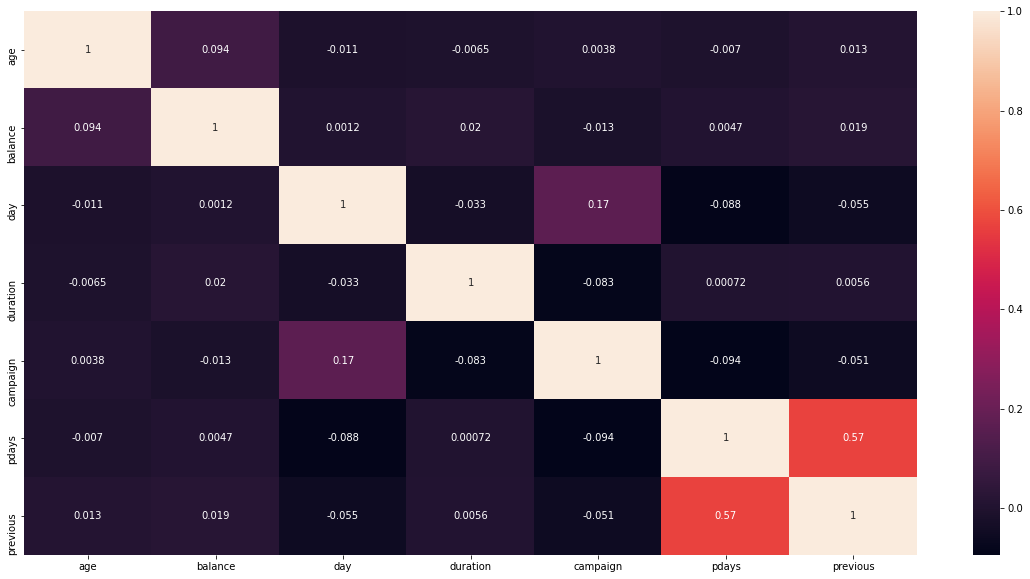

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [ ]:
df1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [ ]:

# Classfication models, Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in df.columns: # Loop through all columns in the dataframe
    if df1[feature].dtype == 'object': # Only apply for columns with categorical strings
        df1[feature] = pd.Categorical(df1[feature]).codes # Replace strings with an integer
        
df1.info(), df1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43371 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        43371 non-null  int64
 1   job        43371 non-null  int8 
 2   marital    43371 non-null  int8 
 3   education  43371 non-null  int8 
 4   default    43371 non-null  int8 
 5   balance    43371 non-null  int64
 6   housing    43371 non-null  int8 
 7   loan       43371 non-null  int8 
 8   contact    43371 non-null  int8 
 9   day        43371 non-null  int64
 10  month      43371 non-null  int8 
 11  duration   43371 non-null  int64
 12  campaign   43371 non-null  int64
 13  pdays      43371 non-null  int64
 14  previous   43371 non-null  int64
 15  poutcome   43371 non-null  int8 
 16  Target     43371 non-null  int8 
dtypes: int64(7), int8(10)
memory usage: 3.1 MB


(None,                 age           job  ...      poutcome        Target
 count  43371.000000  43371.000000  ...  43371.000000  43371.000000
 mean      40.986443      4.696825  ...      1.739158      0.114869
 std       10.595454      3.661037  ...      0.647161      0.318868
 min       18.000000      0.000000  ...      0.000000      0.000000
 25%       33.000000      1.000000  ...      2.000000      0.000000
 50%       39.000000      4.000000  ...      2.000000      0.000000
 75%       48.000000      8.000000  ...      2.000000      0.000000
 max       95.000000     11.000000  ...      2.000000      1.000000
 
 [8 rows x 17 columns])

## Test Train

In [ ]:
from sklearn.model_selection import train_test_split # # Import Sklearn package's data splitting function
from sklearn import metrics
from sklearn import preprocessing

X = df1.drop(['contact','Target'], axis=1)
y = df1['Target']

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [ ]:

## To have an accurate score, let us create another set of data with scaling function applied to it.

ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
rfcl_score=rfcl.score(X_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The confusion matrix of Random Forest Model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Random forest model accuracy is 0.8947894251460191
The confusion matrix of Random Forest Model is
[[11464    45]
 [ 1324   179]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train)

test_pred = abcl.predict(X_test)
abcl_score=abcl.score(X_test, y_test)
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The confusion matrix of Adaboost Ensemble model is")
print(metrics.confusion_matrix(y_test,test_pred))


The Adaboost Ensemble model accuracy is 0.8934829388256994
The confusion matrix of Adaboost Ensemble model is
[[11182   327]
 [ 1059   444]]


In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.8997079618813403
The confusion matrix of Bagging classifier model is
[[11129   380]
 [  925   578]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)
test_pred = gbcl.predict(X_test)
gbcl_score=gbcl.score(X_test , y_test)
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))
print("The confusion matrix of Gradient Boost classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Gradient Boost classifier model accuracy is 0.8992468490624039
The confusion matrix of Gradient Boost classifier model is
[[11302   207]
 [ 1104   399]]


In [ ]:
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))

The Random forest model accuracy is 0.8947894251460191
The Adaboost Ensemble model accuracy is 0.8934829388256994
The Bagging classifier model accuracy is 0.8997079618813403
The Gradient Boost classifier model accuracy is 0.8992468490624039


We can see that the best performance is achieved by a bagged decision tree classifier.